# Machine Learning in Python - Deep Learning

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML, Image
from IPython.display import SVG

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import visualize_tree

from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

from keras.models import Sequential
from keras.layers import Dense, Activation, Merge, Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


## Dataset Pre-Processing

Read in a dataset

In [2]:
abt = pd.read_csv("mnist_train_small.csv", encoding = "ISO-8859-1")

# Put all but the target variable into the descriptive features array
X = abt[abt.columns.difference(["value"])]
Y = abt["value"]

# Use a range scaling to scale all variables to between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
cols = X.columns
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = cols) # Watch out for putting back in columns here

X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(X, Y, random_state=0, test_size = 0.30, train_size = 0.7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_plus_valid, y_train_plus_valid, random_state=0, test_size = 0.199/0.7, train_size = 0.5/0.7)

In [3]:
X_train_plus_valid.shape

(7000, 784)

In [4]:
abt.head()

,value,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,...,X0.608,X0.609,X0.610,X0.611,X0.612,X0.613,X0.614,X0.615,X0.616,X0.617
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

Specfiy the structure of the neural network model

In [6]:
model = Sequential()
# model.add(Dense(input_dim=784, units=512))
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("sigmoid"))
model.add(Dense(units=207))
model.add(Activation("sigmoid"))
model.add(Dense(units=102))
model.add(Activation("sigmoid"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

Specify the parameters of the model optimisation process

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [8]:
# Convert the singl column label into a dummy coded label
y_train_wide = to_categorical(np.asarray(y_train))
y_valid_wide = to_categorical(np.asarray(y_valid))

In [9]:
y_train_wide
# The representation corresponds to softmax units = 10

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
model.fit(np.asfarray(X_train), np.asfarray(y_train_wide), \
          epochs=20, batch_size=32, verbose=1, \
          validation_data=(np.asfarray(X_valid), np.asfarray(y_valid_wide)))

Train on 5000 samples, validate on 1991 samples
Epoch 1/20
5000/5000 [==============================] - 1s 239us/step - loss: 0.2687 - acc: 0.9194 - val_loss: 0.3530 - val_acc: 0.8935
Epoch 2/20
5000/5000 [==============================] - 1s 216us/step - loss: 0.2273 - acc: 0.9306 - val_loss: 0.3497 - val_acc: 0.8935
Epoch 3/20
5000/5000 [==============================] - 1s 214us/step - loss: 0.2021 - acc: 0.9382 - val_loss: 0.2800 - val_acc: 0.9146
Epoch 4/20
5000/5000 [==============================] - 1s 217us/step - loss: 0.1785 - acc: 0.9446 - val_loss: 0.3258 - val_acc: 0.9001
Epoch 5/20
5000/5000 [==============================] - 1s 215us/step - loss: 0.1493 - acc: 0.9548 - val_loss: 0.2679 - val_acc: 0.9181
Epoch 6/20
5000/5000 [==============================] - 1s 220us/step - loss: 0.1327 - acc: 0.9602 - val_loss: 0.3321 - val_acc: 0.8980
Epoch 7/20
5000/5000 [==============================] - 1s 221us/step - loss: 0.1153 - acc: 0.9652 - val_loss: 0.2538 - val_acc: 0.9227


Evaluate the model

In [12]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model.predict_classes(np.asfarray(X_train), batch_size=32)

# Print performance details
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

print("****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(np.asfarray(X_valid))

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(np.asfarray(X_test))

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       520
          1       1.00      1.00      1.00       568
          2       1.00      1.00      1.00       450
          3       1.00      1.00      1.00       513
          4       0.99      1.00      1.00       466
          5       1.00      1.00      1.00       455
          6       1.00      1.00      1.00       479
          7       1.00      1.00      1.00       550
          8       1.00      1.00      1.00       496
          9       1.00      0.99      1.00       503

avg / total       1.00      1.00      1.00      5000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,520,0,0,0,0,0,0,0,0,0,520
1,0,567,0,0,0,0,0,0,0,1,568
2,0,1,448,0,1,0,0,0,0,0,450
3,0,0,1,512,0,0,0,0,0,0,513
4,0,0,0,0,466,0,0,0,0,0,466
5,0,0,0,0,0,455,0,0,0,0,455
6,0,0,0,0,0,0,479,0,0,0,479
7,0,1,0,0,0,0,0,549,0,0,550
8,0,0,0,0,0,0,0,0,496,0,496


****** Validation Data ********
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       221
          1       0.92      0.97      0.95       222
          2       0.97      0.92      0.94       195
          3       0.92      0.93      0.92       201
          4       0.93      0.96      0.95       187
          5       0.92      0.94      0.93       190
          6       0.97      0.93      0.95       197
          7       0.94      0.97      0.96       203
          8       0.96      0.90      0.93       198
          9       0.93      0.91      0.92       177

avg / total       0.94      0.94      0.94      1991

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,216,0,0,0,0,0,1,0,2,2,221
1,0,216,1,4,0,0,0,1,0,0,222
2,1,2,179,3,3,0,2,2,3,0,195
3,0,3,1,187,0,7,0,2,0,1,201
4,0,1,1,0,180,1,0,0,0,4,187
5,2,1,0,3,0,179,0,1,1,3,190
6,2,2,0,0,0,8,184,0,1,0,197
7,1,2,1,0,1,0,0,197,0,1,203
8,0,5,2,6,2,0,2,2,178,1,198


****** Test Data ********
             precision    recall  f1-score   support

          0       0.97      0.94      0.95       289
          1       0.94      0.99      0.96       355
          2       0.96      0.88      0.92       303
          3       0.92      0.92      0.92       303
          4       0.91      0.96      0.94       269
          5       0.88      0.96      0.92       286
          6       0.97      0.93      0.95       310
          7       0.96      0.96      0.96       299
          8       0.93      0.90      0.92       287
          9       0.95      0.92      0.93       299

avg / total       0.94      0.94      0.94      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,271,1,0,1,1,8,0,1,4,2,289
1,0,351,1,1,0,0,0,0,1,1,355
2,1,8,267,7,2,3,2,2,10,1,303
3,0,2,1,280,0,11,0,5,1,3,303
4,0,2,0,0,258,1,1,0,1,6,269
5,1,1,2,2,3,275,2,0,0,0,286
6,3,4,2,1,3,8,289,0,0,0,310
7,0,1,4,2,3,0,0,288,0,1,299
8,1,2,1,8,2,7,5,1,259,1,287


Draw the model

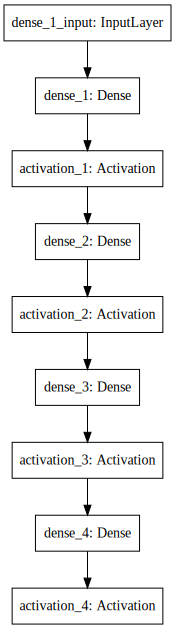

In [13]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Building a Better Model

A more complicated model - based on [https://raw.githubusercontent.com/fchollet/keras/master/examples/mnist_mlp.py](https://raw.githubusercontent.com/fchollet/keras/master/examples/mnist_mlp.py)

In [14]:
model_mlp = Sequential()
model_mlp.add(Dense(512, input_shape=(784,)))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(512))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(10))
model_mlp.add(Activation('softmax'))

model_mlp.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert the singl column label into a dummy coded label
y_train_wide = to_categorical(np.asarray(y_train))
y_valid_wide = to_categorical(np.asarray(y_valid))
model_mlp.fit(np.asfarray(X_train), np.asfarray(y_train_wide), \
          epochs=20, batch_size=32, verbose=1, \
          validation_data=(np.asfarray(X_valid), np.asfarray(y_valid_wide)))

Train on 5000 samples, validate on 1991 samples
Epoch 1/20
5000/5000 [==============================] - 2s 444us/step - loss: 0.5872 - acc: 0.8168 - val_loss: 0.2982 - val_acc: 0.9111
Epoch 2/20
5000/5000 [==============================] - 1s 293us/step - loss: 0.2420 - acc: 0.9266 - val_loss: 0.2184 - val_acc: 0.9307
Epoch 3/20
5000/5000 [==============================] - 2s 300us/step - loss: 0.1496 - acc: 0.9526 - val_loss: 0.2018 - val_acc: 0.9407
Epoch 4/20
5000/5000 [==============================] - 2s 304us/step - loss: 0.1010 - acc: 0.9652 - val_loss: 0.2207 - val_acc: 0.9347
Epoch 5/20
5000/5000 [==============================] - 1s 295us/step - loss: 0.0740 - acc: 0.9770 - val_loss: 0.2041 - val_acc: 0.9382
Epoch 6/20
5000/5000 [==============================] - 2s 308us/step - loss: 0.0676 - acc: 0.9784 - val_loss: 0.2076 - val_acc: 0.9498
Epoch 7/20
5000/5000 [==============================] - 2s 305us/step - loss: 0.0500 - acc: 0.9834 - val_loss: 0.2043 - val_acc: 0.9498


Evaluate the model

In [15]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model_mlp.predict_classes(np.asfarray(X_train), batch_size=32)

# Print performance details
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


print("****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = model_mlp.predict_classes(np.asfarray(X_valid))

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model_mlp.predict_classes(np.asfarray(X_test))

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       520
          1       1.00      1.00      1.00       568
          2       1.00      1.00      1.00       450
          3       1.00      1.00      1.00       513
          4       1.00      1.00      1.00       466
          5       1.00      1.00      1.00       455
          6       1.00      1.00      1.00       479
          7       1.00      1.00      1.00       550
          8       1.00      1.00      1.00       496
          9       1.00      1.00      1.00       503

avg / total       1.00      1.00      1.00      5000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,520,0,0,0,0,0,0,0,0,0,520
1,0,568,0,0,0,0,0,0,0,0,568
2,0,0,450,0,0,0,0,0,0,0,450
3,0,0,0,513,0,0,0,0,0,0,513
4,0,0,0,0,466,0,0,0,0,0,466
5,0,0,0,0,0,455,0,0,0,0,455
6,0,0,0,0,0,0,479,0,0,0,479
7,1,1,0,0,0,0,0,548,0,0,550
8,0,0,0,0,0,0,0,0,496,0,496


****** Validation Data ********
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       221
          1       0.92      0.98      0.95       222
          2       0.97      0.92      0.95       195
          3       0.94      0.94      0.94       201
          4       0.96      0.97      0.97       187
          5       0.96      0.95      0.95       190
          6       0.94      0.97      0.95       197
          7       0.95      0.97      0.96       203
          8       0.93      0.92      0.93       198
          9       0.96      0.91      0.93       177

avg / total       0.95      0.95      0.95      1991

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,215,0,0,0,0,1,3,0,1,1,221
1,0,217,1,4,0,0,0,0,0,0,222
2,1,2,180,2,0,0,4,2,4,0,195
3,0,3,1,188,0,2,1,2,3,1,201
4,0,1,1,0,181,1,0,0,1,2,187
5,2,0,0,2,0,180,1,1,2,2,190
6,1,1,0,0,0,3,191,0,1,0,197
7,2,3,0,0,1,0,0,197,0,0,203
8,0,4,1,4,0,0,4,1,183,1,198


****** Test Data ********
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       289
          1       0.95      0.99      0.97       355
          2       0.98      0.90      0.94       303
          3       0.94      0.96      0.95       303
          4       0.94      0.94      0.94       269
          5       0.94      0.95      0.95       286
          6       0.94      0.96      0.95       310
          7       0.94      0.97      0.96       299
          8       0.93      0.95      0.94       287
          9       0.97      0.91      0.94       299

avg / total       0.95      0.95      0.95      3000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,282,1,0,0,0,1,0,1,4,0,289
1,0,352,1,1,0,0,0,0,0,1,355
2,1,7,272,9,1,1,0,3,8,1,303
3,0,1,1,291,0,4,0,4,2,0,303
4,1,3,0,0,253,0,7,1,1,3,269
5,0,0,0,3,2,271,4,1,4,1,286
6,2,1,0,1,0,5,299,0,2,0,310
7,0,2,3,0,2,0,1,290,0,1,299
8,1,1,1,0,1,3,7,0,273,0,287


Draw the model

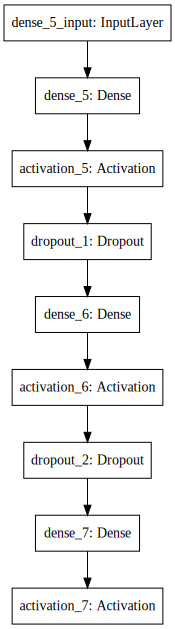

In [16]:
SVG(model_to_dot(model_mlp).create(prog='dot', format='svg'))